# Подготовка

In [ ]:
!pip install eo-learn -q

     |████████████████████████████████| 10.5 MB 8.5 MB/s 
     |████████████████████████████████| 69 kB 7.8 MB/s 
     |████████████████████████████████| 201 kB 53.2 MB/s 
     |████████████████████████████████| 131 kB 48.8 MB/s 
     |████████████████████████████████| 133 kB 50.6 MB/s 
     |████████████████████████████████| 1.0 MB 42.4 MB/s 
     |████████████████████████████████| 53.8 MB 123 kB/s 
     |████████████████████████████████| 19.3 MB 1.4 MB/s 
     |████████████████████████████████| 15.4 MB 14.7 MB/s 
     |████████████████████████████████| 994 kB 32.8 MB/s 
     |████████████████████████████████| 6.3 MB 37.8 MB/s 
     |████████████████████████████████| 3.1 MB 30.9 MB/s 
     |████████████████████████████████| 8.4 MB 13.7 MB/s 
     |████████████████████████████████| 128 kB 45.9 MB/s 
     |████████████████████████████████| 79 kB 7.8 MB/s 
     |████████████████████████████████| 127 kB 40.9 MB/s 
     |████████████████████████████████| 47 kB 4.5 MB/s 
     |█████████████

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, glob
import cv2
import eolearn
import gdown
from pathlib import Path
import zipfile

from eolearn.core import EOPatch, FeatureType

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive #a
drive.mount('/content/drive')

Mounted at /content/drive


## Гиперпараметры

In [ ]:
TARGET_SIZE = (64, 64)
num_channels = 19
year = 2019

## Загрузка архива

### Разливы

In [ ]:
INPUT_FOLDER =  '/content/drive/MyDrive/colab_files/final/spills/'

for file_name in os.listdir(INPUT_FOLDER):
    with zipfile.ZipFile(INPUT_FOLDER + file_name) as zip_ref:
        zip_ref.extractall("spills")

In [ ]:
def renamed(dirpath, names, encoding):
        new_names = [old.encode('cp437').decode(encoding) for old in names]
        for old, new in zip(names, new_names):
                os.rename(os.path.join(dirpath, old), os.path.join(dirpath, new))
        return new_names

encoding = 'cp866'
for dirpath, dirs, files in os.walk('spills', topdown=True):
        renamed(dirpath, files, encoding)
        dirs[:] = renamed(dirpath, dirs, encoding)


### СSV

In [ ]:
file_id = '1Eo08JT3zZT8nktTE2Wwqfwng4bpbnNGU'
filename = gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)
file_id = '1-1tU61PQWnBUSzq526qz1DAVOv4YkPeq'
filename = gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)
file_id = '1-63tzsg8CJNnFV981LIn-oW0X8m4pzYP'
filename = gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)
file_id = '1-7zTG4SgwvXVAFu9ymzGuRoABYUgfw8T'
filename = gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)
file_id = '1-IeklYjpQYNJ5AiljlERYzdMXG9mFFgT'
filename = gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)
file_id = '1-IeklYjpQYNJ5AiljlERYzdMXG9mFFgT'
filename = gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)

Downloading...
From: https://drive.google.com/uc?id=1Eo08JT3zZT8nktTE2Wwqfwng4bpbnNGU
To: /content/clean_pollution.csv
100%|██████████| 683k/683k [00:00<00:00, 77.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-1tU61PQWnBUSzq526qz1DAVOv4YkPeq
To: /content/clean_pollution_w_names_n_idx2020.csv
100%|██████████| 88.0k/88.0k [00:00<00:00, 55.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-63tzsg8CJNnFV981LIn-oW0X8m4pzYP
To: /content/clean_pollution_w_names_n_idx2019.csv
100%|██████████| 256k/256k [00:00<00:00, 27.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-7zTG4SgwvXVAFu9ymzGuRoABYUgfw8T
To: /content/clean_pollution_w_names_n_idx2018.csv
100%|██████████| 152k/152k [00:00<00:00, 34.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-IeklYjpQYNJ5AiljlERYzdMXG9mFFgT
To: /content/clean_pollution_w_names_n_idx2017.csv
100%|██████████| 102k/102k [00:00<00:00, 48.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-IeklYjpQYNJ5AiljlERYzd

In [ ]:
file_id = '1-0KypqrB6uoD9xZyYaPGHqQ94hSSW1Mn'
filename = gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)

Downloading...
From: https://drive.google.com/uc?id=1-0KypqrB6uoD9xZyYaPGHqQ94hSSW1Mn
To: /content/clean_pollution_w_names_n_idx_2021.csv
100%|██████████| 80.1k/80.1k [00:00<00:00, 27.1MB/s]


In [ ]:
file_id = '1EqsaKDXplnGdPG0qaa_JX25qnaHz-Yqb'
gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)

Downloading...
From: https://drive.google.com/uc?id=1EqsaKDXplnGdPG0qaa_JX25qnaHz-Yqb
To: /content/files_pollution.csv
100%|██████████| 7.05M/7.05M [00:00<00:00, 111MB/s]


'files_pollution.csv'

## Сборка датасета

### Функции

In [ ]:
# ЛУК-2020-1	15.0	0,1,2,3,4,

def prepare_batch(filename, id_max, idx):
    proto_idx = tf.make_tensor_proto(idx)
    idx = tf.make_ndarray(proto_idx)
    idx = [int(i) for i in idx[0].decode().split(',')[:-1]]
    lbls = []
    id_max = int(float(id_max))
    for i in range(id_max + 1):
        if i in idx:
            lbls.append(1.)
        else:
            lbls.append(0.)
    return filename, tf.expand_dims(lbls, -1)

prepare_batch(tf.Variable('ЛУК-2020-1'), tf.Variable(['15.0']), tf.Variable(['2,3,4,10,']))

(<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'\xd0\x9b\xd0\xa3\xd0\x9a-2020-1'>,
 <tf.Tensor: shape=(16, 1), dtype=float32, numpy=
 array([[0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32)>)

In [ ]:
def read_file(item, label, shuffle=True):
    try:
        eopatch = EOPatch.load(item[0].numpy().decode())
        img = eopatch.data['L2A']
        masks = [eopatch.mask[x] for x in eopatch.mask]
        img = np.concatenate([img] + masks, axis=-1)
        # перемешивание примеров внутри батча
        # if shuffle:
        #     idx = np.random.choice(img.shape[0], img.shape[0], replace=False).astype('int')
        #     img = np.array([img[i] for i in idx])
        #     label = np.array([label[i] for i in idx])
        if DROP_CHANNEL != 18:
            return np.concatenate([img[..., :DROP_CHANNEL], img[..., DROP_CHANNEL+1:]], axis=-1), label
        elif DROP_CHANNEL == 18:
            return img[..., :DROP_CHANNEL], label
    except:
        return tf.zeros(shape=(1, 64, 64, 18)), tf.zeros(shape=(1, 1))

In [ ]:
@tf.function()
def augmentation(img, label):
    '''
    Случайное вращение и отражение изображения для аугментации
    '''
    
    if tf.random.uniform(()) > 0.5:
    # Случайное отражение по горизонтали
        img = tf.image.flip_left_right(img)

    if tf.random.uniform(()) > 0.5:
    # Случайное отражение по вертикали
        img = tf.image.flip_up_down(img)

    if tf.random.uniform(()) > 0.5:
    # Случайное транспонирование
        img = tf.image.transpose(img)

    # if tf.random.uniform(()) > 0.5:
    #     # Вращение
    #     img = rotation(img)

    if tf.random.uniform(()) > 0.1:
    # Зашумление картинки
        img = tf.cast(img, tf.float32) + tf.random.uniform((tf.shape(img)), tf.random.uniform((), .3, .8), 0.99)

    return img, label

## Датасет

In [ ]:
df = pd.read_csv('/content/clean_pollution_w_names_n_idx_2021.csv')
df.head()

,Unnamed: 0,cat_pollution,lat,lon,date,cat_ground,square,filename,idx_max,idx
0,3,нефть,73.547472,62.557611,2021-02-18 00:00:00,земли лесного фонда,0.0100,ЛУК-КГ-2020-1,18.0,"0,1,"
1,4,нефть,73.983397,62.129353,2021-02-18 00:00:00,земли лесного фонда,0.0050,ЛУК-КГ-2020-2,17.0,"0,"
2,40,нефтепродукты,61.043514,63.788392,2021-02-18 00:00:00,земли лесного фонда,0.0064,ЛУК-2020-1,15.0,"0,1,2,3,4,"
3,46,нефть,65.139139,61.272858,2021-02-12 00:00:00,земли лесного фонда,0.0553,ЛУК-2020-2,38.0,"2,3,4,5,6,"
4,52,нефтепродукты,61.297472,64.450694,2021-02-12 00:00:00,земли лесного фонда,0.0059,ЛУК-2020-3,9.0,"0,1,2,3,"


In [ ]:
all_filenames = glob.glob(f'/content/spills/*/*')

In [ ]:
all_filenames[0]

'/content/spills/2021-13/РН-ЮНГ-2015-642'

In [ ]:
len(all_filenames)

11804

In [ ]:
data_names = []
data_idx = []
data_idx_max = []

for i in range(len(df)):
    filename = df.iloc[i]['filename']
    idx = df.iloc[i]['idx']
    idx_max = df.iloc[i]['idx_max']

    for name in all_filenames:
        if filename + ' ' in name + ' ':
            data_names.append(name)
            data_idx.append(idx)
            data_idx_max.append(idx_max)

In [ ]:
len(data_names), len(data_idx), len(data_idx_max)

(461, 461, 461)

In [ ]:
np.random.seed(0)
idx_split = np.arange(len(data_names))
np.random.shuffle(idx_split)
train_split = idx_split[50:]
val_split = idx_split[:50]

data_names = np.array(data_names)
data_idx = np.array(data_idx)
data_idx_max = np.array(data_idx_max)

print("train:", len(data_names[train_split]))
print("val:", len(data_names[val_split]))

DROP_CHANNEL = 18

dataset_names = tf.data.Dataset.from_tensor_slices(data_names[train_split])
dataset_idx = tf.data.Dataset.from_tensor_slices(data_idx[train_split])
dataset_idx_max = tf.data.Dataset.from_tensor_slices(data_idx_max[train_split])

val_dataset_names = tf.data.Dataset.from_tensor_slices(data_names[val_split])
val_dataset_idx = tf.data.Dataset.from_tensor_slices(data_idx[val_split])
val_dataset_idx_max = tf.data.Dataset.from_tensor_slices(data_idx_max[val_split])

dataset = tf.data.Dataset.zip((dataset_names, dataset_idx_max, dataset_idx)).shuffle(512).batch(1)
val_dataset = tf.data.Dataset.zip((val_dataset_names, val_dataset_idx_max, val_dataset_idx)).shuffle(512).batch(1)

# prepare_batch(filename, id_max, idx)
dataset = dataset.map(
        lambda filename, id_max, idx: tuple(tf.py_function(prepare_batch,
                                                            [filename, id_max, idx], 
                                                            [tf.string, tf.float32])))
val_dataset = val_dataset.map(
        lambda filename, id_max, idx: tuple(tf.py_function(prepare_batch,
                                                            [filename, id_max, idx], 
                                                            [tf.string, tf.float32])))

# функция подгрузки изображений
dataset = dataset.map(
        lambda item, label: tuple(tf.py_function(read_file, [item, label], [tf.float32, tf.float32])))
val_dataset = val_dataset.map(
        lambda item, label: tuple(tf.py_function(read_file, [item, label], [tf.float32, tf.float32])))

# слой вращения
rotation = layers.experimental.preprocessing.RandomRotation(factor=0.07)

# функция аугментации изображений
dataset = dataset.map(augmentation, num_parallel_calls=tf.data.AUTOTUNE)

for i, batch in enumerate(val_dataset):
    print(len(batch))
    print(batch[0].shape)
    print(batch[1].shape)
    if i > 4:
        break

train: 411
val: 50
2
(1, 64, 64, 18)
(1, 1)
2
(13, 64, 64, 18)
(13, 1)
2
(13, 64, 64, 18)
(13, 1)
2
(1, 64, 64, 18)
(1, 1)
2
(24, 64, 64, 18)
(24, 1)
2
(18, 64, 64, 18)
(18, 1)


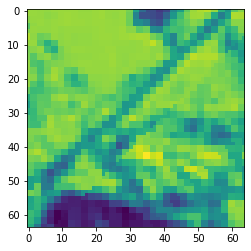

In [ ]:
plt.imshow(batch[0][0, ..., 4])
plt.show()

## NN

In [ ]:
class GCAdam(tf.keras.optimizers.Adam):
    def get_gradients(self, loss, params):
        '''
        Оптимизатор для централизации градиента, ускоряющий процесс обучения
        '''
        grads = []
        gradients = super().get_gradients()
        for grad in gradients:
            grad_len = len(grad.shape)
            if grad_len > 1:
                axis = list(range(grad_len - 1))
                grad -= tf.reduce_mean(grad, axis=axis, keep_dims=True)
            grads.append(grad)

        return grads

class Schedule():
    '''
    Расписание уменьшения шага обучения для коллбэка
    Уменьшение начинается co start_epoch и происходит каждые per_epoch
    '''
    def __init__(self, start_epoch=5, per_epoch=1):
        self.start_epoch = start_epoch
        self.per_epoch = per_epoch

    def __call__(self, epoch, lr):
        if epoch >= self.start_epoch and epoch % self.per_epoch == 0:
            lr *= tf.math.exp(-0.1)
        print('learning rate:', float(lr))
        return lr

### CCT

### Гиперпараметры

In [ ]:
positional_emb = True
conv_layers = 2
projection_dim = 128

num_heads = 2
transformer_units = [
    projection_dim,
    projection_dim,
]
transformer_layers = 2
stochastic_depth_rate = 0.1

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 128
num_epochs = 30
image_size = 64
input_shape = [64, 64, 18]

### Токенайзер

In [ ]:

class CCTTokenizer(layers.Layer):
    def __init__(
        self,
        kernel_size=3,
        stride=1,
        padding=1,
        pooling_kernel_size=3,
        pooling_stride=2,
        num_conv_layers=conv_layers,
        num_output_channels=[64, 128],
        positional_emb=positional_emb,
        **kwargs,
    ):
        super(CCTTokenizer, self).__init__(**kwargs)

        self.conv_model = keras.Sequential()
        for i in range(num_conv_layers):
            self.conv_model.add(
                layers.Conv2D(
                    num_output_channels[i],
                    kernel_size,
                    stride,
                    padding="valid",
                    use_bias=False,
                    activation="relu",
                    kernel_initializer="he_normal",
                )
            )
            self.conv_model.add(layers.ZeroPadding2D(padding))
            self.conv_model.add(
                layers.MaxPool2D(pooling_kernel_size, pooling_stride, "same")
            )

        self.positional_emb = positional_emb

    def call(self, images):
        outputs = self.conv_model(images)
        # После прохождения данной мини-сетки изображение превращается в ряд последовательностей
        reshaped = tf.reshape(
            outputs,
            (-1, tf.shape(outputs)[1] * tf.shape(outputs)[2], tf.shape(outputs)[-1]),
        )
        return reshaped

    def positional_embedding(self, image_size):
        # Опциональная часть с позиционным эмбеддингом
        if self.positional_emb:
            dummy_inputs = tf.ones((1, image_size, image_size, num_channels))
            dummy_outputs = self.call(dummy_inputs)
            sequence_length = tf.shape(dummy_outputs)[1]
            projection_dim = tf.shape(dummy_outputs)[-1]

            embed_layer = layers.Embedding(
                input_dim=sequence_length, output_dim=projection_dim
            )
            return embed_layer, sequence_length
        else:
            return None


### Stochastic depth

[Stochastic depth](https://arxiv.org/abs/1603.09382) -
техника регуляризации, которая случайным образом блокирует работу некоторых слоев нейросети. По смыслу близка к "дропауту" - [Dropout](https://jmlr.org/papers/v15/srivastava14a.html), с той разницей, что дропаут блокирует отдельные нейроны.

In [ ]:
# Источник: github.com:rwightman/pytorch-image-models.
class StochasticDepth(layers.Layer):
    def __init__(self, drop_prop, **kwargs):
        super(StochasticDepth, self).__init__(**kwargs)
        self.drop_prob = drop_prop

    def call(self, x, training=None):
        if training:
            keep_prob = 1 - self.drop_prob
            shape = (tf.shape(x)[0],) + (1,) * (len(tf.shape(x)) - 1)
            random_tensor = keep_prob + tf.random.uniform(shape, 0, 1)
            random_tensor = tf.floor(random_tensor)
            return (x / keep_prob) * random_tensor
        return x


### multilayer perceptron (MLP) для энкодера трансформера

In [ ]:

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


### Финальная сборка модели

In [ ]:

def create_cct_model(
    input_shape=input_shape,
    image_size=image_size,
    num_heads=num_heads,
    projection_dim=projection_dim,
    transformer_units=transformer_units,
):

    inputs = layers.Input(input_shape)

    # Кодирование (нарезка) патчей.
    cct_tokenizer = CCTTokenizer()
    encoded_patches = cct_tokenizer(inputs)

    # Применение позиционного эмбеддинга.

    # Stochastic Depth
    dpr = [x for x in np.linspace(0, stochastic_depth_rate, transformer_layers)]

    # Блоки трансформера.
    for i in range(transformer_layers):
        # Нормализация.
        x1 = layers.LayerNormalization(epsilon=1e-5)(encoded_patches)

        # Self-Attention-блок.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)

        # Skip-connection.
        attention_output = StochasticDepth(dpr[i])(attention_output)
        x2 = layers.Add()([attention_output, encoded_patches])

        # Нормализация.
        x3 = layers.LayerNormalization(epsilon=1e-5)(x2)

        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)

        # Skip-connection.
        x3 = StochasticDepth(dpr[i])(x3)
        encoded_patches = layers.Add()([x3, x2])

    # Применение sequence pooling для получения взвешенного выхода сети.
    representation = layers.LayerNormalization(epsilon=1e-5)(encoded_patches)
    attention_weights = tf.nn.softmax(layers.Dense(1,)(representation), axis=1)
    weighted_representation = tf.matmul(
        attention_weights, representation, transpose_a=True
    )
    weighted_representation = tf.squeeze(weighted_representation, -2)

    # Выход классификатора.
    logits = layers.Dense(1,  activation='sigmoid')(weighted_representation)
    # Готовая модель
    model = keras.Model(inputs=inputs, outputs=logits)
    return model


# Эксперимент

Простой эксперимент для некоторого увеличения интерпретабельности модели. 

Эксперимент схож по смыслу с популярным методом интерпретации моделей компьютерного зрения - Leave-One-Out - при котором удаляются отдельные участки изображения.

В нашем случае маленьких, но многоканальных снимков, мы будем удалять из входных батчей по одному каналу, и результат точности модели после обучения будет сравниваться. Очевидно, что наименее важные каналы будут иметь наименьшее влияние на точность.
Веса модели каждый раз будут сбрасываться.

In [ ]:
def run_experiment():
    # посеем семя, чтобы снизить фактор случайности
    tf.random.set_seed(0)
    # создаем модель
    model = create_cct_model(input_shape = [64, 64, 18])

    optimizer = GCAdam(learning_rate=0.0001)
    schedule_callback = tf.keras.callbacks.LearningRateScheduler(Schedule(5, 1))
    callbacks = [schedule_callback]
    # компилируем
    model.compile(
        optimizer=optimizer,
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[
            keras.metrics.BinaryAccuracy(name="accuracy")
        ],
    )
    # обучаем 12 эпох с выводом промежуточных характерискик, с постепенным понижением шага обучения
    history = model.fit(
        dataset,
        validation_data=val_dataset,
        epochs=12,
        callbacks=callbacks
    )
    # выводим графики обучения
    plt.figure(figsize=(18, 7))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Crossentropy')
    plt.plot(history.history['val_loss'], label='Val Crossentropy')
    plt.legend()
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

### Удаляем канал 1

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 41s 87ms/step - loss: 0.2920 - accuracy: 0.8667 - val_loss: 0.2255 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 34s 84ms/step - loss: 0.2303 - accuracy: 0.8948 - val_loss: 0.2199 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2162 - accuracy: 0.8956 - val_loss: 0.2105 - val_accuracy: 0.9020 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2039 - accuracy: 0.9141 - val_loss: 0.2182 - val_accuracy: 0.9037 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 35s 85ms/step - loss: 0.1985 - accuracy: 0.9181 - val_loss: 0.2043 - val_accuracy: 0.9105 - lr: 1.0000e-04
learning r

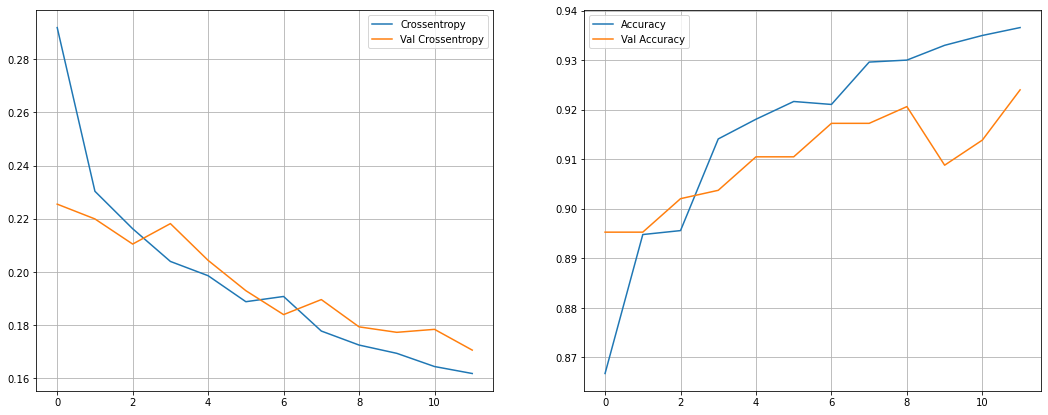

In [ ]:
DROP_CHANNEL = 0

run_experiment()

### Удаляем канал 2

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 40s 86ms/step - loss: 0.3004 - accuracy: 0.8693 - val_loss: 0.2271 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2297 - accuracy: 0.8958 - val_loss: 0.2056 - val_accuracy: 0.8970 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 34s 83ms/step - loss: 0.2149 - accuracy: 0.9023 - val_loss: 0.1935 - val_accuracy: 0.9223 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 34s 84ms/step - loss: 0.2022 - accuracy: 0.9117 - val_loss: 0.1923 - val_accuracy: 0.9189 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 34s 83ms/step - loss: 0.1958 - accuracy: 0.9157 - val_loss: 0.2041 - val_accuracy: 0.9088 - lr: 1.0000e-04
learning r

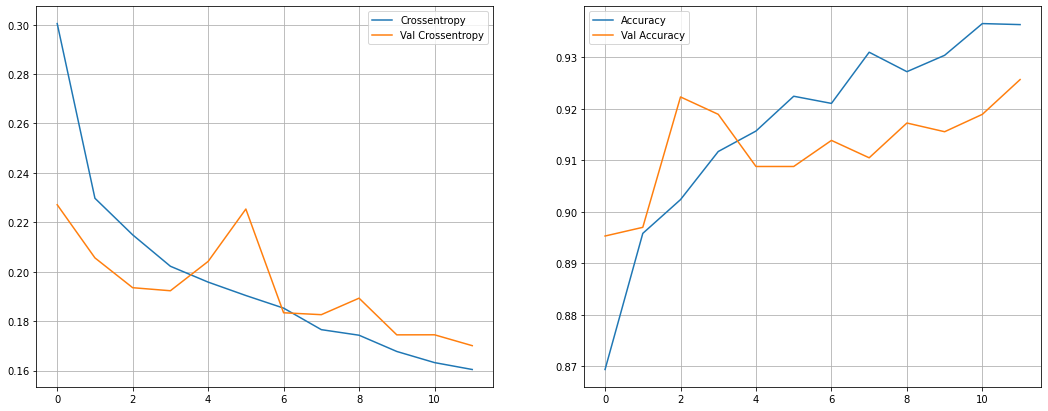

In [ ]:
DROP_CHANNEL = 1

run_experiment()

### Удаляем канал 3

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 40s 86ms/step - loss: 0.2863 - accuracy: 0.8793 - val_loss: 0.2223 - val_accuracy: 0.8970 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2319 - accuracy: 0.8914 - val_loss: 0.2103 - val_accuracy: 0.9020 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 35s 86ms/step - loss: 0.2186 - accuracy: 0.8970 - val_loss: 0.2084 - val_accuracy: 0.8986 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2073 - accuracy: 0.9055 - val_loss: 0.2287 - val_accuracy: 0.9071 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 35s 86ms/step - loss: 0.1969 - accuracy: 0.9187 - val_loss: 0.1909 - val_accuracy: 0.9172 - lr: 1.0000e-04
learning r

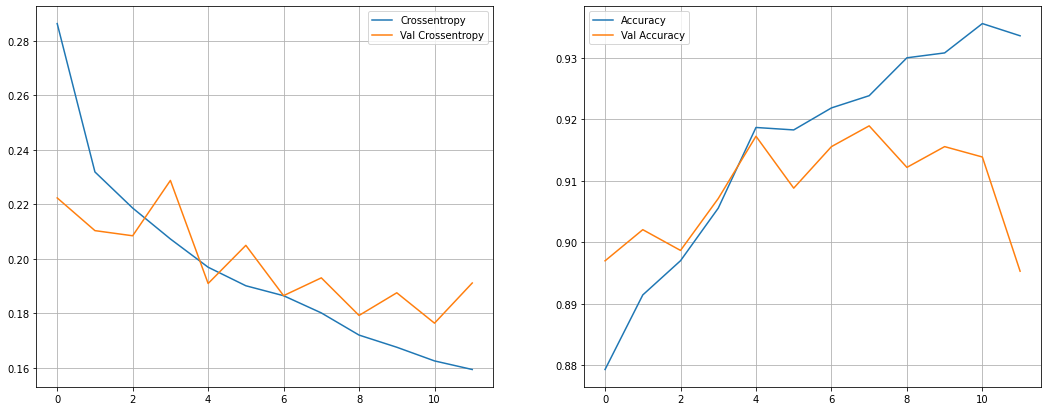

In [ ]:
DROP_CHANNEL = 2

run_experiment()

### Удаляем канал 4

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 40s 87ms/step - loss: 0.2861 - accuracy: 0.8717 - val_loss: 0.2226 - val_accuracy: 0.8970 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 36s 88ms/step - loss: 0.2313 - accuracy: 0.8906 - val_loss: 0.2099 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 36s 87ms/step - loss: 0.2190 - accuracy: 0.8984 - val_loss: 0.2343 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 36s 87ms/step - loss: 0.2105 - accuracy: 0.9077 - val_loss: 0.1961 - val_accuracy: 0.9307 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 35s 86ms/step - loss: 0.2008 - accuracy: 0.9153 - val_loss: 0.2015 - val_accuracy: 0.9088 - lr: 1.0000e-04
learning r

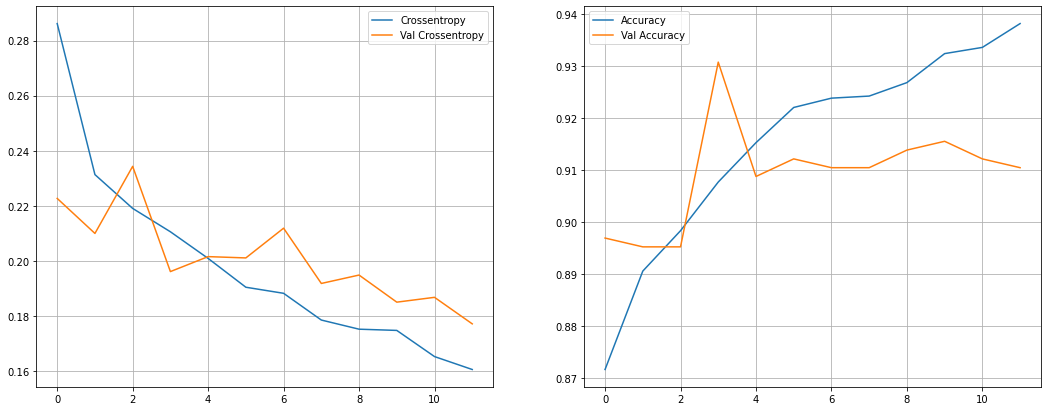

In [ ]:
DROP_CHANNEL = 3

run_experiment()

### Удаляем канал 5

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 39s 85ms/step - loss: 0.2820 - accuracy: 0.8731 - val_loss: 0.2286 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 34s 83ms/step - loss: 0.2282 - accuracy: 0.8964 - val_loss: 0.2465 - val_accuracy: 0.8615 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 34s 83ms/step - loss: 0.2187 - accuracy: 0.8976 - val_loss: 0.2118 - val_accuracy: 0.9071 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 34s 83ms/step - loss: 0.2115 - accuracy: 0.9049 - val_loss: 0.2042 - val_accuracy: 0.9003 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 34s 84ms/step - loss: 0.1990 - accuracy: 0.9137 - val_loss: 0.1962 - val_accuracy: 0.9054 - lr: 1.0000e-04
learning r

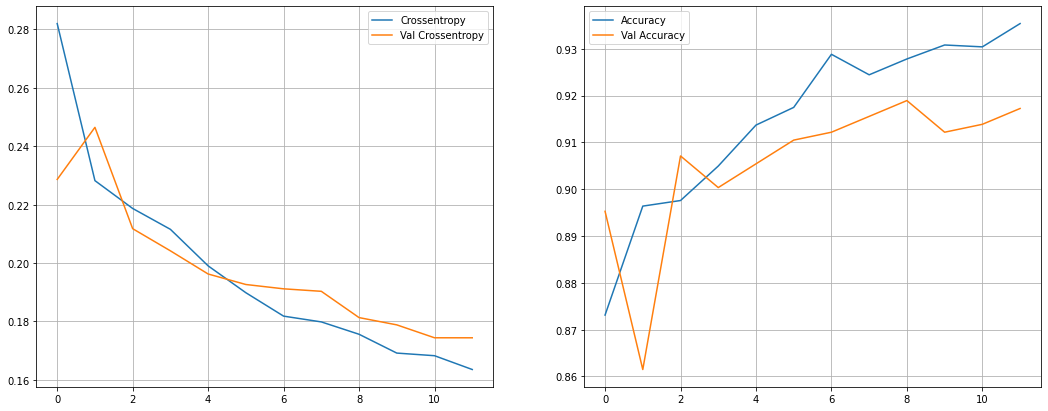

In [ ]:
DROP_CHANNEL = 4

run_experiment()

### Удаляем канал 6

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 40s 86ms/step - loss: 0.2827 - accuracy: 0.8763 - val_loss: 0.2298 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2306 - accuracy: 0.8924 - val_loss: 0.2153 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2145 - accuracy: 0.8976 - val_loss: 0.2113 - val_accuracy: 0.8986 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2032 - accuracy: 0.9123 - val_loss: 0.2182 - val_accuracy: 0.9003 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 34s 84ms/step - loss: 0.1999 - accuracy: 0.9151 - val_loss: 0.1959 - val_accuracy: 0.9105 - lr: 1.0000e-04
learning r

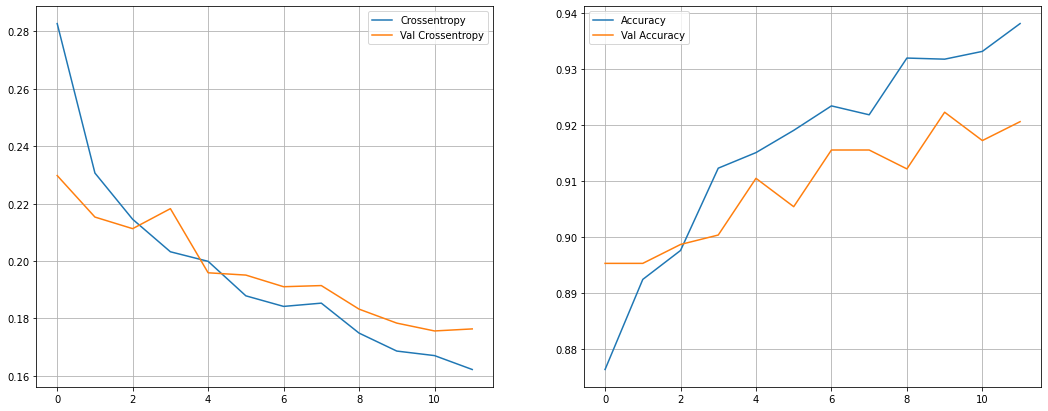

In [ ]:
DROP_CHANNEL = 5

run_experiment()

### Удаляем канал 7

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 41s 87ms/step - loss: 0.2903 - accuracy: 0.8701 - val_loss: 0.2286 - val_accuracy: 0.9020 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 35s 86ms/step - loss: 0.2302 - accuracy: 0.8956 - val_loss: 0.2091 - val_accuracy: 0.8970 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 34s 84ms/step - loss: 0.2183 - accuracy: 0.8986 - val_loss: 0.2119 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2077 - accuracy: 0.9057 - val_loss: 0.1943 - val_accuracy: 0.9088 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 35s 84ms/step - loss: 0.1949 - accuracy: 0.9109 - val_loss: 0.1980 - val_accuracy: 0.9088 - lr: 1.0000e-04
learning r

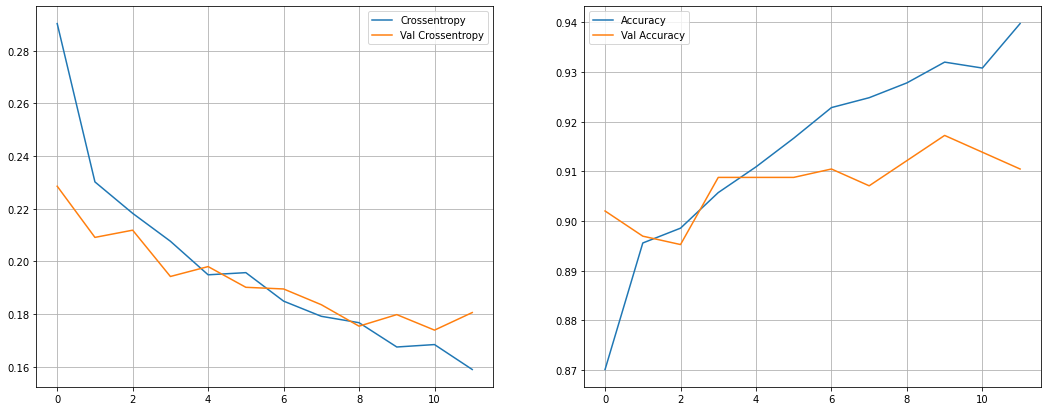

In [ ]:
DROP_CHANNEL = 6

run_experiment()

### Удаляем канал 8

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 40s 87ms/step - loss: 0.2941 - accuracy: 0.8719 - val_loss: 0.2275 - val_accuracy: 0.9003 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2304 - accuracy: 0.8924 - val_loss: 0.2256 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2227 - accuracy: 0.8998 - val_loss: 0.2016 - val_accuracy: 0.9105 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 34s 83ms/step - loss: 0.2051 - accuracy: 0.9093 - val_loss: 0.1959 - val_accuracy: 0.9122 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 35s 85ms/step - loss: 0.1961 - accuracy: 0.9175 - val_loss: 0.1970 - val_accuracy: 0.9139 - lr: 1.0000e-04
learning r

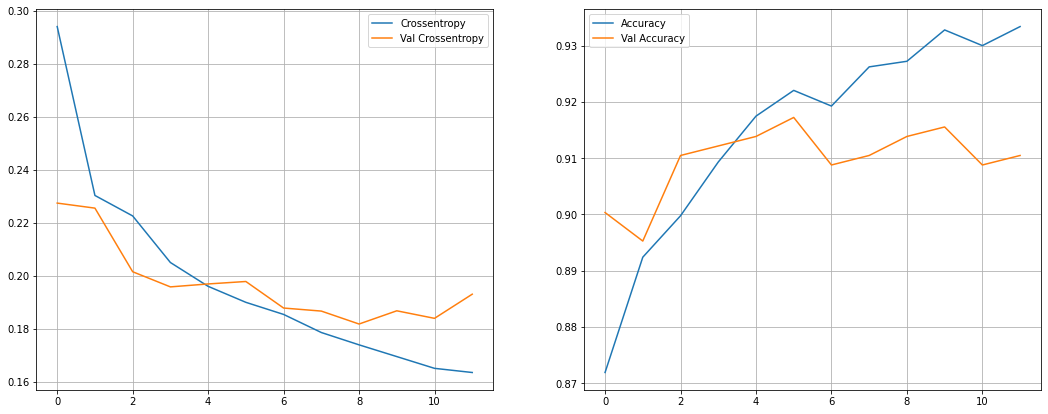

In [ ]:
DROP_CHANNEL = 7

run_experiment()

### Удаляем канал 9

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 39s 84ms/step - loss: 0.2882 - accuracy: 0.8723 - val_loss: 0.2314 - val_accuracy: 0.8936 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2304 - accuracy: 0.8918 - val_loss: 0.2116 - val_accuracy: 0.9054 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2195 - accuracy: 0.9006 - val_loss: 0.1986 - val_accuracy: 0.9071 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2029 - accuracy: 0.9099 - val_loss: 0.2479 - val_accuracy: 0.8564 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 34s 84ms/step - loss: 0.1965 - accuracy: 0.9147 - val_loss: 0.1992 - val_accuracy: 0.9088 - lr: 1.0000e-04
learning r

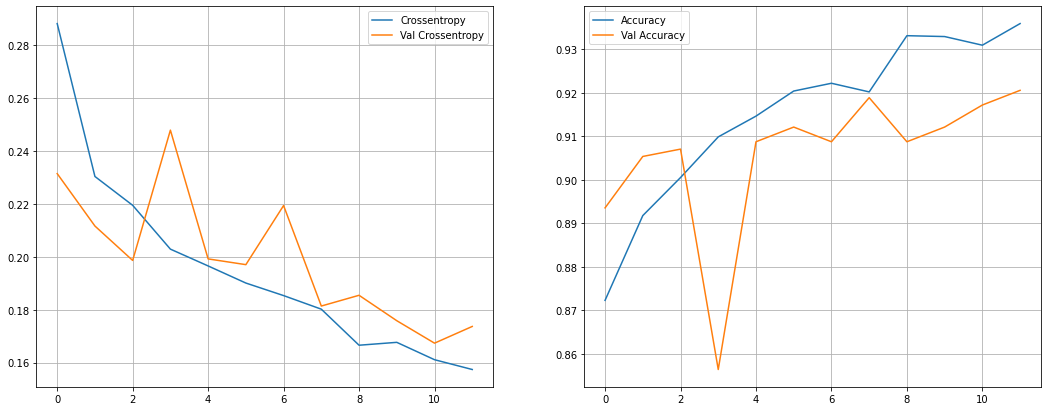

In [ ]:
DROP_CHANNEL = 8

run_experiment()

### Удаляем канал 10

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 41s 88ms/step - loss: 0.2808 - accuracy: 0.8743 - val_loss: 0.2335 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2325 - accuracy: 0.8966 - val_loss: 0.2127 - val_accuracy: 0.8986 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2184 - accuracy: 0.8992 - val_loss: 0.1987 - val_accuracy: 0.9223 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2065 - accuracy: 0.9111 - val_loss: 0.1971 - val_accuracy: 0.9088 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 35s 85ms/step - loss: 0.1969 - accuracy: 0.9095 - val_loss: 0.2016 - val_accuracy: 0.9105 - lr: 1.0000e-04
learning r

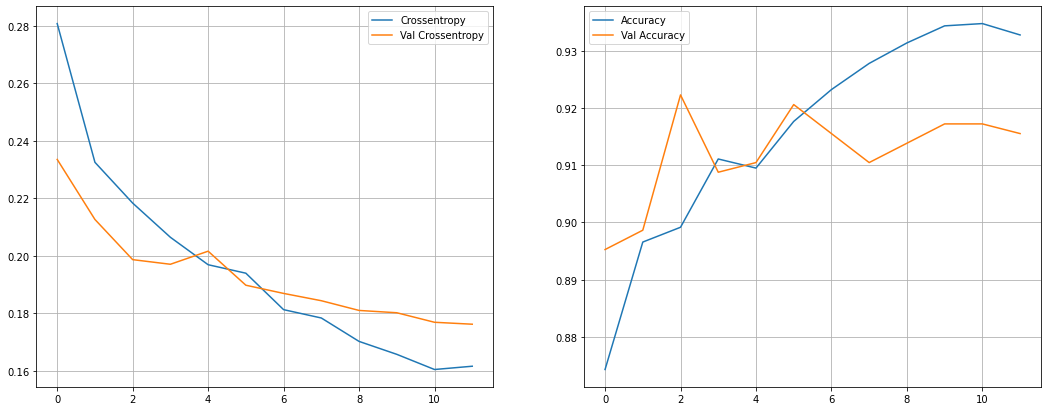

In [ ]:
DROP_CHANNEL = 9

run_experiment()

### Удаляем канал 11

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 39s 84ms/step - loss: 0.2908 - accuracy: 0.8723 - val_loss: 0.2257 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 34s 83ms/step - loss: 0.2308 - accuracy: 0.8912 - val_loss: 0.2314 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2201 - accuracy: 0.8966 - val_loss: 0.2010 - val_accuracy: 0.9003 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 34s 83ms/step - loss: 0.2063 - accuracy: 0.9031 - val_loss: 0.1974 - val_accuracy: 0.8986 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 34s 84ms/step - loss: 0.1998 - accuracy: 0.9165 - val_loss: 0.2042 - val_accuracy: 0.9088 - lr: 1.0000e-04
learning r

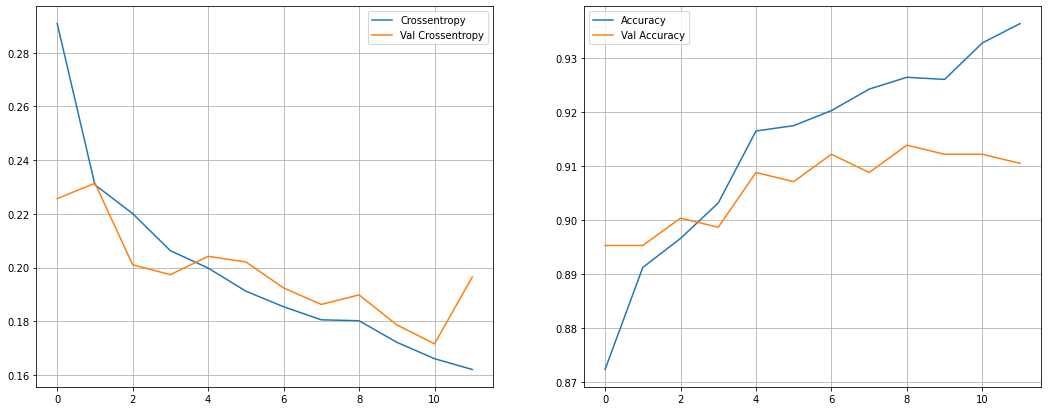

In [ ]:
DROP_CHANNEL = 10

run_experiment()

### Удаляем канал 12

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 80s 87ms/step - loss: 0.2879 - accuracy: 0.8731 - val_loss: 0.2269 - val_accuracy: 0.9020 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2318 - accuracy: 0.8894 - val_loss: 0.2150 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2189 - accuracy: 0.8988 - val_loss: 0.1998 - val_accuracy: 0.9054 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 34s 84ms/step - loss: 0.2057 - accuracy: 0.9123 - val_loss: 0.1949 - val_accuracy: 0.9189 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 35s 84ms/step - loss: 0.1980 - accuracy: 0.9179 - val_loss: 0.1994 - val_accuracy: 0.9037 - lr: 1.0000e-04
learning r

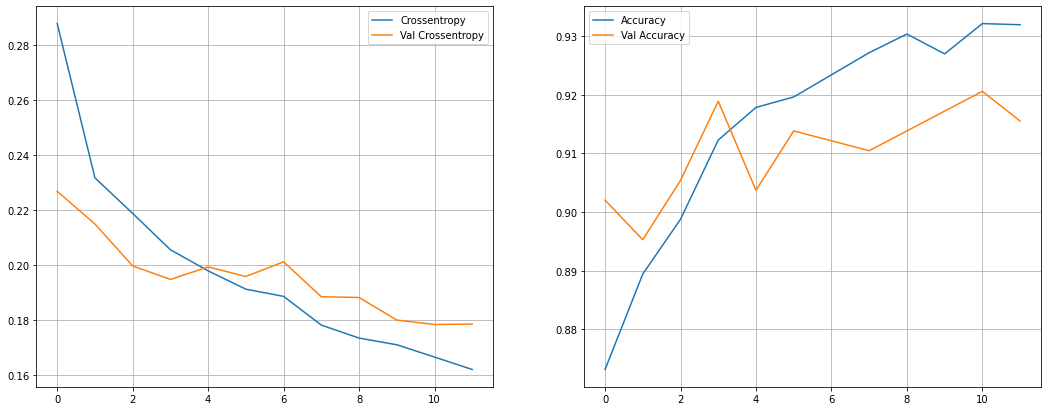

In [ ]:
DROP_CHANNEL = 11

run_experiment()

### Удаляем канал 13

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 40s 87ms/step - loss: 0.2866 - accuracy: 0.8737 - val_loss: 0.2244 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 35s 86ms/step - loss: 0.2316 - accuracy: 0.8938 - val_loss: 0.2149 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 35s 86ms/step - loss: 0.2173 - accuracy: 0.9021 - val_loss: 0.1992 - val_accuracy: 0.9240 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 35s 86ms/step - loss: 0.2059 - accuracy: 0.9069 - val_loss: 0.2237 - val_accuracy: 0.8986 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 35s 86ms/step - loss: 0.1939 - accuracy: 0.9165 - val_loss: 0.1912 - val_accuracy: 0.9139 - lr: 1.0000e-04
learning r

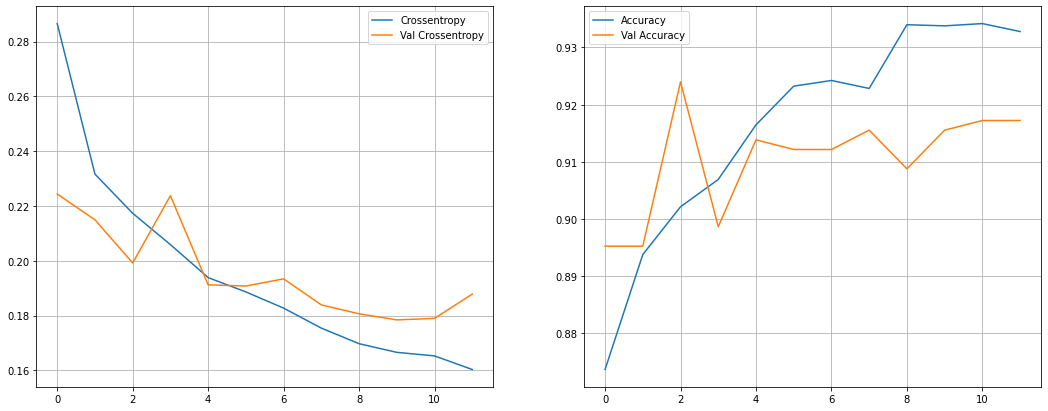

In [ ]:
DROP_CHANNEL = 12

run_experiment()

### Удаляем канал 14

In [ ]:
DROP_CHANNEL = 13

run_experiment()

### Удаляем канал 15

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 40s 86ms/step - loss: 0.2645 - accuracy: 0.8763 - val_loss: 0.2179 - val_accuracy: 0.9020 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2257 - accuracy: 0.8978 - val_loss: 0.2135 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 36s 88ms/step - loss: 0.2163 - accuracy: 0.8972 - val_loss: 0.2679 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2062 - accuracy: 0.9081 - val_loss: 0.1970 - val_accuracy: 0.9037 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2026 - accuracy: 0.9125 - val_loss: 0.1924 - val_accuracy: 0.9054 - lr: 1.0000e-04
learning r

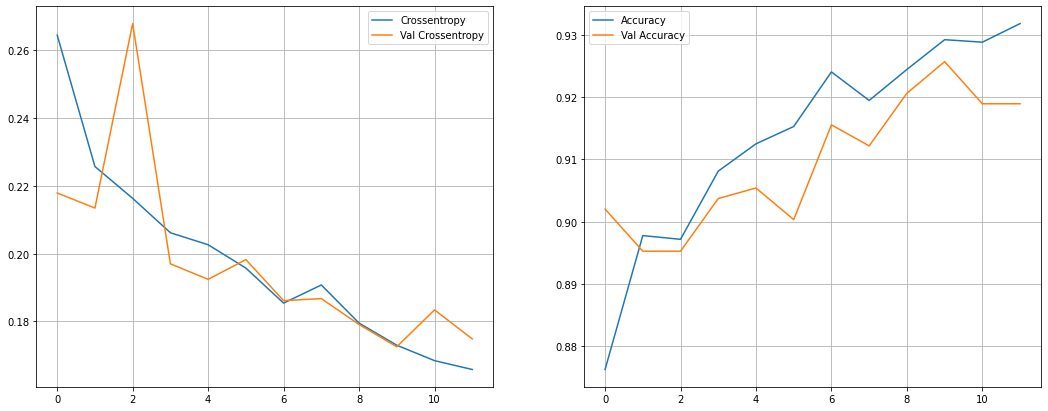

In [ ]:
DROP_CHANNEL = 14

run_experiment()

### Удаляем канал 16

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 40s 86ms/step - loss: 0.2731 - accuracy: 0.8783 - val_loss: 0.2246 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 34s 83ms/step - loss: 0.2256 - accuracy: 0.8966 - val_loss: 0.2074 - val_accuracy: 0.9155 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 34s 84ms/step - loss: 0.2142 - accuracy: 0.9018 - val_loss: 0.1942 - val_accuracy: 0.9139 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2060 - accuracy: 0.9035 - val_loss: 0.1977 - val_accuracy: 0.9054 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 35s 85ms/step - loss: 0.1987 - accuracy: 0.9073 - val_loss: 0.2035 - val_accuracy: 0.9054 - lr: 1.0000e-04
learning r

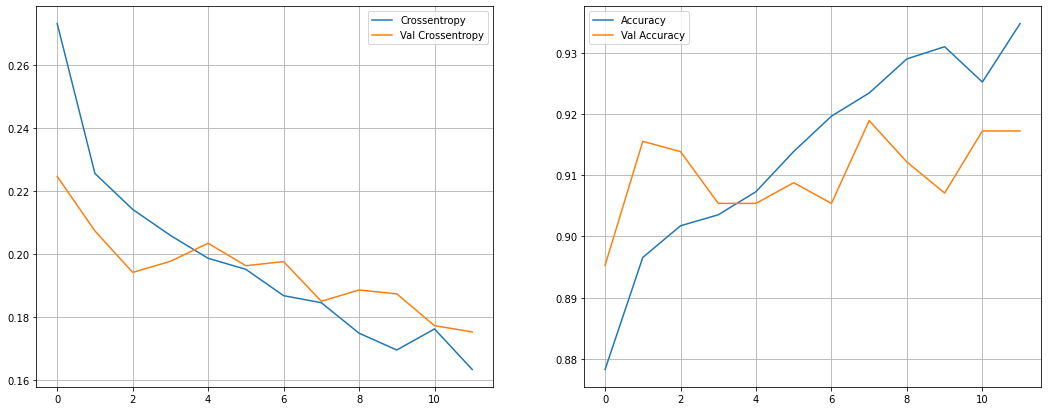

In [ ]:
DROP_CHANNEL = 15

run_experiment()

### Удаляем канал 17

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 41s 89ms/step - loss: 0.2815 - accuracy: 0.8765 - val_loss: 0.2359 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2226 - accuracy: 0.9023 - val_loss: 0.2144 - val_accuracy: 0.8919 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2150 - accuracy: 0.9031 - val_loss: 0.1933 - val_accuracy: 0.9054 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2053 - accuracy: 0.9147 - val_loss: 0.1859 - val_accuracy: 0.9054 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2062 - accuracy: 0.9101 - val_loss: 0.2340 - val_accuracy: 0.8750 - lr: 1.0000e-04
learning r

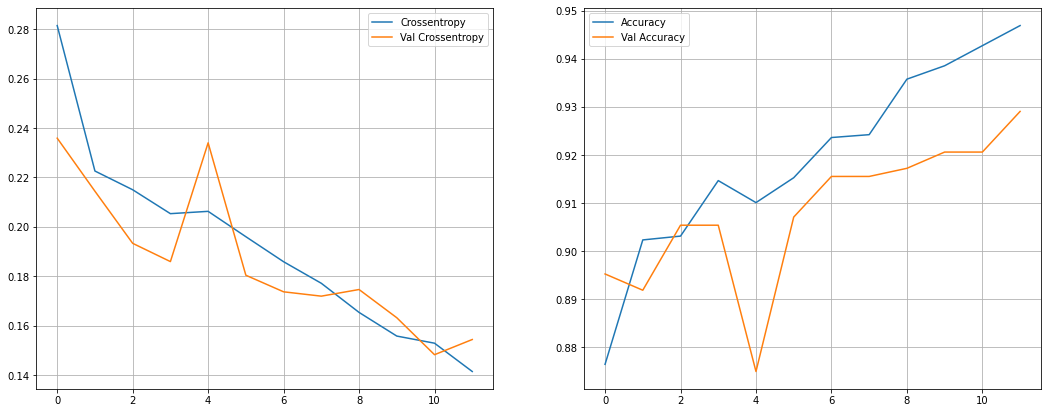

In [ ]:
DROP_CHANNEL = 16

run_experiment()

### Удаляем канал 18

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 41s 87ms/step - loss: 0.2676 - accuracy: 0.8791 - val_loss: 0.2324 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 35s 84ms/step - loss: 0.2274 - accuracy: 0.8936 - val_loss: 0.2172 - val_accuracy: 0.8970 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2200 - accuracy: 0.9029 - val_loss: 0.2015 - val_accuracy: 0.9003 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 35s 86ms/step - loss: 0.2106 - accuracy: 0.9113 - val_loss: 0.1993 - val_accuracy: 0.9054 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2014 - accuracy: 0.9145 - val_loss: 0.2016 - val_accuracy: 0.9122 - lr: 1.0000e-04
learning r

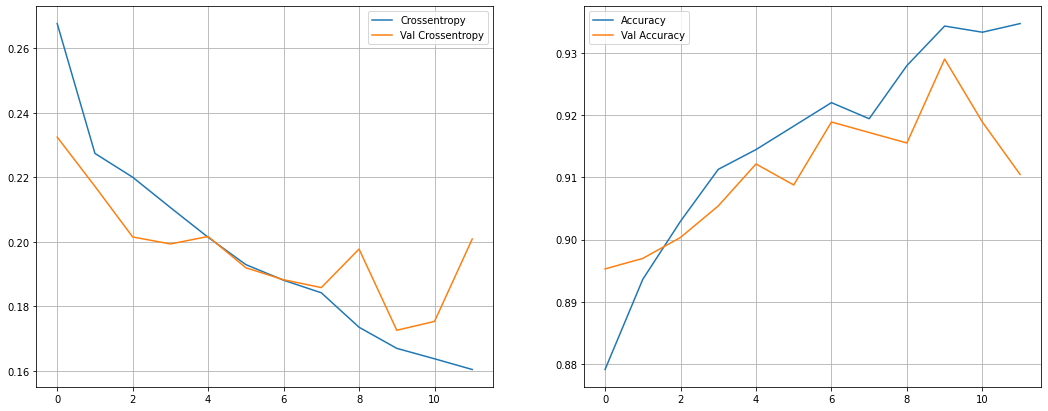

In [ ]:
DROP_CHANNEL = 17

run_experiment()

### Удаляем канал 19

learning rate: 9.999999747378752e-05
Epoch 1/12
411/411 [==============================] - 42s 88ms/step - loss: 0.2819 - accuracy: 0.8677 - val_loss: 0.2239 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2291 - accuracy: 0.8948 - val_loss: 0.2173 - val_accuracy: 0.8986 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2180 - accuracy: 0.9008 - val_loss: 0.2363 - val_accuracy: 0.8953 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/12
411/411 [==============================] - 35s 85ms/step - loss: 0.2079 - accuracy: 0.9077 - val_loss: 0.1892 - val_accuracy: 0.9122 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/12
411/411 [==============================] - 35s 86ms/step - loss: 0.2038 - accuracy: 0.9121 - val_loss: 0.1883 - val_accuracy: 0.9122 - lr: 1.0000e-04
learning r

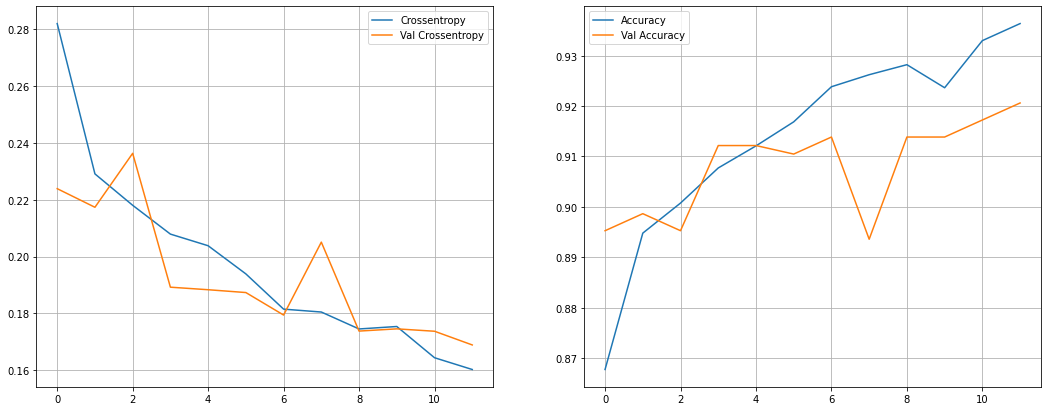

In [ ]:
DROP_CHANNEL = 18

run_experiment()

### Итоги

В результате можно заметить, что удаление большинства каналов не особо сказалось на точности модели. Однако удаление каналов 3го и 8го привело к более заметному падению точности. 

Возможно, стоит более тщательно изучить эту тему и провести более длительный тест нейросети.